In [2]:
import numpy as np 

import matplotlib.pyplot as plt

In [15]:
x = np.linspace(0, 2, 20)
y_true = x**3 + 2*x**2 + 4

In [24]:
y = y_true + np.random.normal(0, 1, x.shape[0])

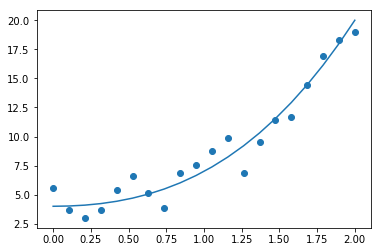

In [26]:
plt.scatter(x, y)
plt.plot(x, y_true)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [32]:
x = x.reshape((20, 1))

In [34]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
def plot_model(model, x=x, y=y, y_true=y_true):
    _x_plot = np.linspace(0,2,y.shape[0])
    _y_plot = model.predict(x)
    
    plt.plot(_x_plot, _y_plot)
    plt.plot(_x_plot, y_true)
    plt.scatter(_x_plot, y)
    

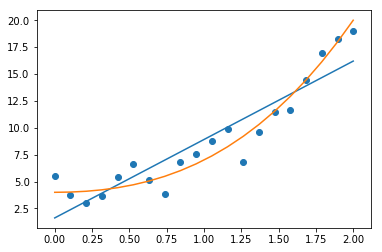

In [60]:
plot_model(lr)

нелинейная модель

In [46]:
x_poly = np.hstack([x**i for i in range(20)])

In [47]:
lr_poly = LinearRegression()

In [48]:
lr_poly.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Строим график

In [65]:
# много точек по х, чтобы было гладенько
x_poly_plot = np.hstack([(np.linspace(0,2,200)**i).reshape(200,1) \
                         for i in range(20)])

In [67]:
# для много точек предсказал
y_poly_predict = lr_poly.predict(x_poly_plot)

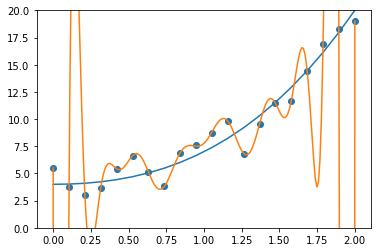

In [70]:
# все нарисовал
plt.ylim((0, 20))
plt.scatter(x, y)
plt.plot(x, y_true)
plt.plot(x_poly_plot[:, 1], y_poly_predict)

In [73]:
np.abs(lr_poly.coef_).max()

4736098334.128432

In [74]:
np.abs(lr.coef_).max()

7.290966992298646

In [75]:
from sklearn.linear_model import Ridge

In [98]:
ridge_1 = Ridge(alpha=1)
ridge_1.fit(x_poly, y)
y_pred_ridge_plot = ridge_1.predict(x_poly_plot)

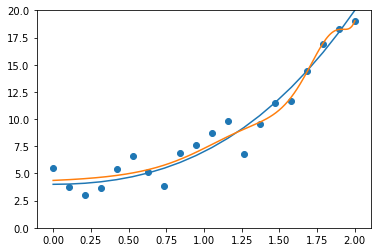

In [99]:
# все нарисовал
plt.ylim((0, 20))
plt.scatter(x, y)
plt.plot(x, y_true)
plt.plot(x_poly_plot[:, 1], y_pred_ridge_plot)

In [86]:
np.max(np.abs(ridge_1.coef_))

0.7690396418084317

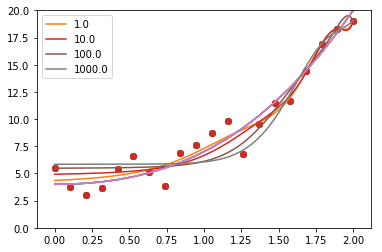

In [104]:
for alpha in np.logspace(0, 3, 4):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_poly, y)
    
    y_pred_ridge_plot = ridge.predict(x_poly_plot)
    
    # все нарисовал
    plt.ylim((0, 20))
    plt.scatter(x, y)
    plt.plot(x, y_true)
    plt.plot(x_poly_plot[:, 1], y_pred_ridge_plot, label = str(alpha))

plt.legend()

In [105]:
from sklearn.linear_model import Lasso

In [106]:
ls = Lasso()
ls.fit(x_poly, y)
y_pred_plot_lasso = ls.predict(x_poly_plot)

/home/anton/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


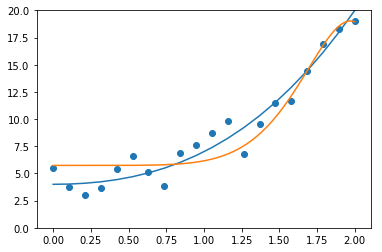

In [107]:
# все нарисовал
plt.ylim((0, 20))
plt.scatter(x, y)
plt.plot(x, y_true)
plt.plot(x_poly_plot[:, 1], y_pred_plot_lasso)

In [111]:
(ls.coef_ == 0).astype(int).sum()

8

In [138]:
ls = Lasso(0.1)
ls.fit(x_poly[:, 0:5], y)
y_pred_plot_lasso = ls.predict(x_poly_plot[:, 0:5])

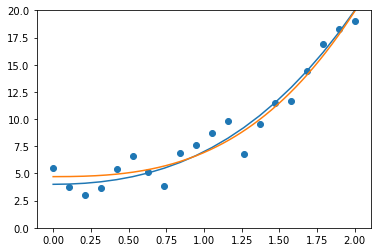

In [139]:
# все нарисовал
plt.ylim((0, 20))
plt.scatter(x, y)
plt.plot(x, y_true)
plt.plot(x_poly_plot[:, 1], y_pred_plot_lasso)

In [140]:
np.where(ls.coef_ != 0)

(array([2, 3]),)

In [142]:
ls.coef_

array([0.        , 0.        , 0.62983591, 1.58805334, 0.        ])